## Practice of topic 3

### BDA : Big Data Analysis



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

### 기초통계 
- 평균
- 중앙값
- 최빈값
- 편차
- 분산
- 표준편차
- 범위 : IQR의 개념 

### 평균

In [2]:
df = pd.read_excel('excel_exam.xlsx')

In [3]:
df

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


- 평균 : (특정 column의 component의 합) / (number of component)

In [6]:
sum((df['math']))/len(df)
# 평균이 나올 것 

57.45

In [7]:
sum((df['english']))/len(df)

84.9

### 중앙값

In [12]:
df_m=np.sort(np.array(df['math']))


In [14]:
np.median(df_m)

54.0

#### 중앙값과 평균은 다르다는 점을 명심할 것.

In [15]:
df_m

array([20, 25, 30, 45, 45, 46, 48, 50, 50, 50, 58, 60, 65, 65, 75, 78, 80,
       80, 89, 90])

### 최빈값
- 가장 많이 나오는 값

In [18]:
pd.Series(df_m).mode()
# mode 함수는 판다스 시리즈에서만 사용 가능해서 자료형 바꾼 것
# mode를 사용 

0    50
dtype: int64

### 편차(deiviation) 
- 편차 : 평균값과 개별 관측값에 대한 차이를 나타내는 것
- 각각의 component들이 얼마나 평균과 인접해있는지를 알 수 있음.

In [24]:
df_1=df.query('nclass==1')

In [23]:
df_2=df.query('nclass==2')

In [27]:
df_mm_1=np.mean(df_1['math'])
df_mm_2=np.mean(df_2['math'])

In [29]:
df_mm_2

61.25

In [30]:
df_mm_1

46.25

In [33]:
#편차를 구하면

df_1['math_dv']=df_1['math'] - df_mm_1

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_49817/3890115353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['math_dv']=df_1['math'] - df_mm_1


In [32]:
df_2['math'] - df_mm_2

4   -36.25
5   -11.25
6    18.75
7    28.75
Name: math, dtype: float64

## 분산

**(편차)^2의 평균**

- 평균으로만 바라보고 분포를 생각한다면 정말 다른 분포들도 값이 동일하다고 판단할 수 있다.
- 그렇기 떄문에 우리가 분산이라는 이 흩어진정도를 보면서
- 두 개의 집단이 같은 분포인지를 확인하는 것

In [37]:
np.mean(df_1.math_dv**2)

117.1875

In [39]:
np.var(df_1['math'])

117.1875

### 표준편차
- sqrt (분산)

### 범위

- 분산이나 표준편차와는 다르다.
- 왜 다를까?

- 최댓값, 최소값 차이로 볼 수 있다.
- 최댓값과 최소값의 차이로 사분위 범위 만들 수 있다.


In [40]:
np.percentile(df_1['math'],25)

41.25

In [41]:
np.percentile(df_1['math'],75)

52.5

In [42]:
np.percentile(df_1['math'],50)

47.5

In [43]:
df_1['math']

0    50
1    60
2    45
3    30
Name: math, dtype: int64

In [44]:
df.describe()

,id,nclass,math,english,science
count,20.00000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,3.000000,57.450000,84.900000,59.450000
std,5.91608,1.450953,20.299015,12.875517,25.292968
min,1.00000,1.000000,20.000000,56.000000,12.000000
25%,5.75000,2.000000,45.750000,78.000000,45.000000
50%,10.50000,3.000000,54.000000,86.500000,62.500000
75%,15.25000,4.000000,75.750000,98.000000,78.000000
max,20.00000,5.000000,90.000000,98.000000,98.000000


- describe에서 나오는 모든 지표들이 결국 위의 식과 가정들이 함께 녹여있는 것이라
- 데이터를 보고 이해할 때 그 뒤에 배경들을 꼭 잘 알고 있어야 한다.

### 정규화

- 통일된 지표를 만들려고 한다.

- 비교를 하기 위해서 값을 어떤 통일된 범위로 만들어서 비교하려고 하는 것
- Z-score 정규화

In [45]:
import seaborn as sns

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_49817/3977748472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['math'])


<Axes: xlabel='math', ylabel='Density'>

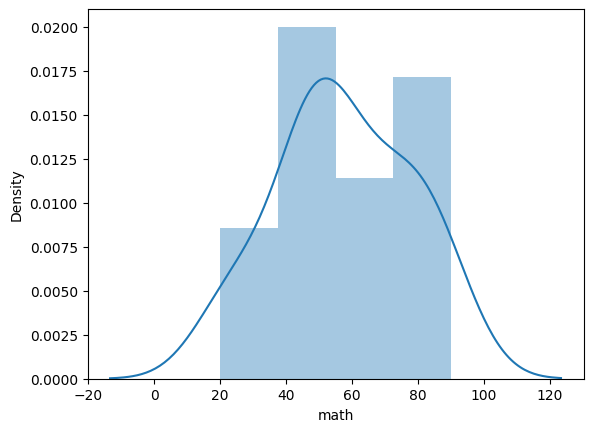

In [46]:
sns.distplot(df['math'])

/var/folders/sz/167qwb595mqgwry5mm8685n00000gn/T/ipykernel_49817/829270766.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['english'])


<Axes: xlabel='english', ylabel='Density'>

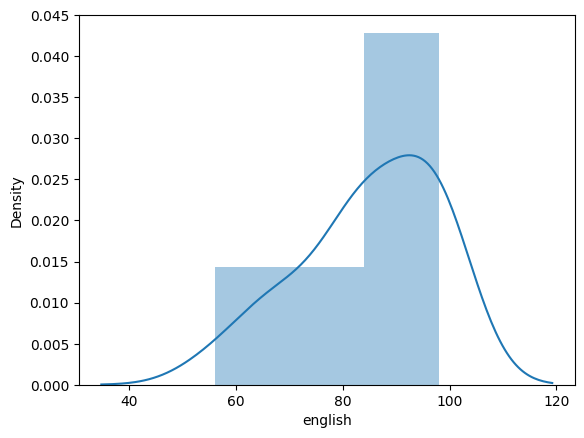

In [47]:
sns.distplot(df['english'])

In [48]:
# sns 에 있는 데이터가 존재
tip=sns.load_dataset('tips')

In [50]:

tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<Axes: >

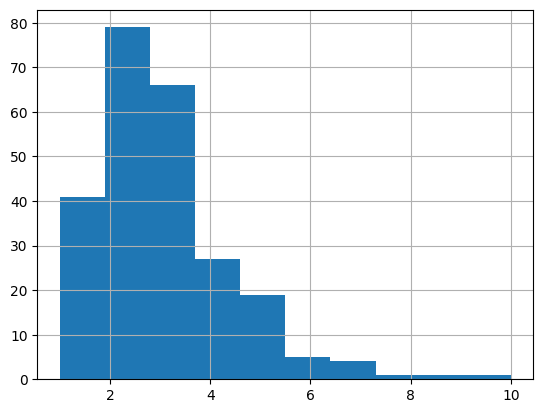

In [53]:
tip['tip'].hist()

In [6]:
# 전체적으로 값을 조정하여 분포파악을 쉽게 함

## z스코어 formula

In [56]:
z_tips=(tip['tip'] - np.mean(tip['tip']))/ np.std(tip['tip'])

In [58]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: >

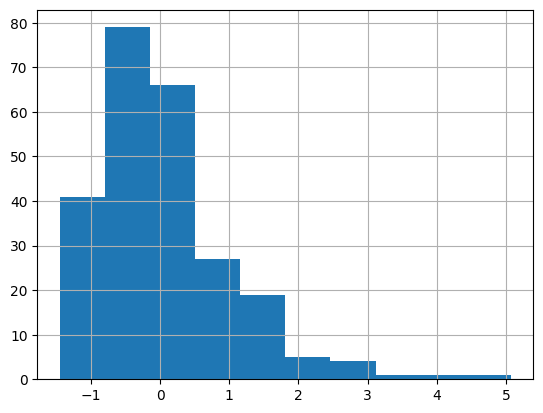

In [59]:
z_tips.hist()

In [57]:
z_tips

0     -1.439947
1     -0.969205
2      0.363356
3      0.225754
4      0.443020
         ...   
239    2.115963
240   -0.722971
241   -0.722971
242   -0.904026
243    0.001247
Name: tip, Length: 244, dtype: float64

In [61]:
#왼쪽 로그 스케일링을 사용한다
z_log_tips=np.log10(tip['tip'])